<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025_2_ava/blob/main/FICCD_Claudomiro_ativ_2_3_M%C3%A9tricas_ROC_AUC_features_Raimunda_Branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 2.3 - Métricas, ROC, AUC, features](https://docs.google.com/presentation/d/1dIYv3U4NY_lFedzcTdFRl46shDsw47QOANZVHzRdU04/edit?slide=id.g32b6a360b9f_0_0#slide=id.g32b6a360b9f_0_0)**

**Belém, 11 de junho de 2025.**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

#####**A)** *Poste no seu Jupyter as figuras a seguir e as explique em detalhes [ch01.ipynb](https://colab.research.google.com/drive/14GIGVoDpCZPkWRIF0GZSlexCfHIi4EI_?usp=sharing):*

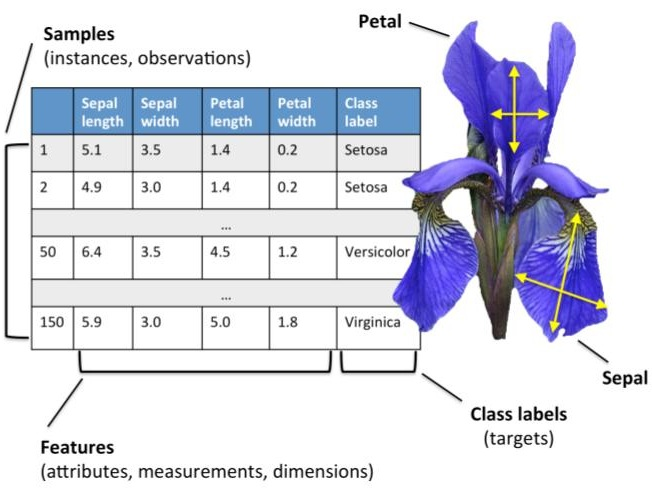

A imagem acima trata da Iris dataset, que é bastante utilizado em machine learning em problemas de classificação.

* O dataset possui 150 amostras. Cada linha da tabela representa uma amostra. Para esse dataset, cada amostra representa uma flor. As pétalas e as sépalas são os componentes que estão sendo medidos em comprimento (length) e largura (width), como indicado nas setas amarelas.
* As features são representadas pelas colunas (com exceção da última coluna), que mostram as propriedades que podem ser medidas de cada amostra.
* A última coluna representa as classes, que neste caso, são divididas em 3 espécies de flores: setosa, versicolor e virginica.
* As features são as entradas e utilizadas para prever a classe. Já as classes são os valores de saída, ou seja, o alvo que o modelo deve prever.
* Em resumo, o objetivo desse modelo é ser treinado com as medidas de comprimento e largura das pétalas e sépalas para prever a espécie da flor.


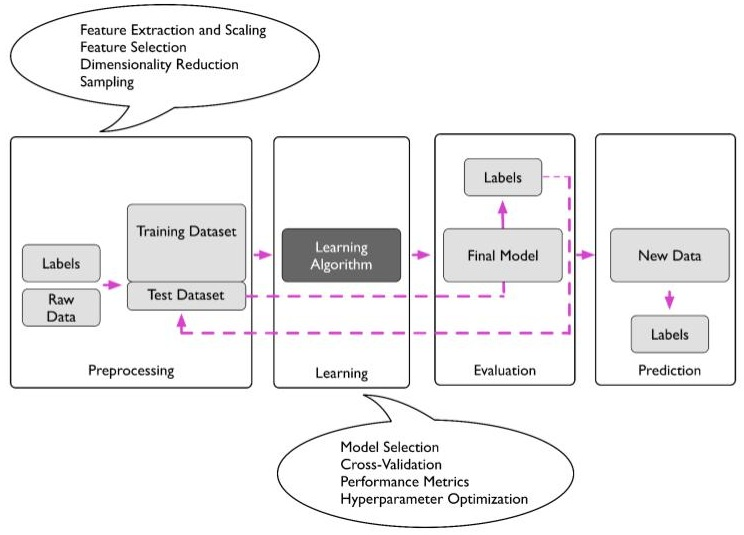

A imagem acima mostra um diagrama representando o fluxo de trabalho para criar um modelo de machine learning supervisionado.
* 1ª fase - Preprocessing: aqui os labels (classes) e o raw data (dados brutos) são tratados a partir de várias técnicas, como estração e escalonamento de features, seleção de features, redução de dimensionalidade e sampling. Nesta fase os dados também são divididos em training dataset e test dataset, onde o modelo aprende com os dados de treino e testado com dados de teste inéditos.
* 2ª fase - Learning Algorithm: o algoritmo de aprendizado é treinado a partir do training dataset. Este algoritmo pode ser KNN, nayve Bayes etc. Então o algoritmo processa os dados do conjunto para aprender os padrões que irão conectar as features aos labels.
* 3ª fase - Evaluation: aqui o modelo treinado (final model) é avaliado para verificar se funciona bem e se tem a capacidade de generalização. A avaliação é realizada com o test dataset, como indicado na seta tracejada. Também compara-se com os labels para ajustar o modelo. Nesta fase há os processos de model selection, cross-validation, performance metrics e hyperparameter optimization.
* 4ª fase - Prediction: Por fim, o modelo final vai ser usado com novos dados e então utilizar os padrões aprendidos para prever os labels.


**Conclusão:**

As imagens mostram como funciona o aprendizado de máquina supervisionado. Elas explicam desde a organização dos dados (com amostras, features e classes) até as etapas para criar um modelo,incluindo tratamento dos dados, treinamento, testes e previsões.

#####**B)** *Faça uma apresentação no Jupyter sobre as principais métricas: accuracy, precision, recall e F1-score.*
*Para cada métrica crie células com figuras e textos explicando a métrica. Além disso, para cada uma delas crie, usando Pandas, duas matrizes de confusão e calcule a métrica. Uma dessas matrizes **deve ser tal que demonstre a desvantagem da métrica**. Discuta os resultados. Lembre da parte em negrito.*

As métricas de avaliação são importantes para entender o desempenho dos modelos de classificação.

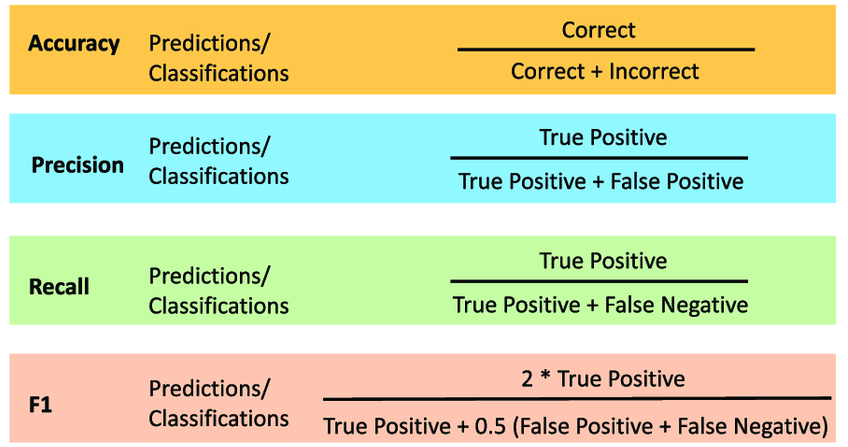


Fonte: https://www.researchgate.net/figure/Evaluation-metrics-accuracy-precision-recall-F-score-and-Intersection-over-Union_fig2_358029719

**Matriz de confusão** é uma tabela que descreve o desempenho de um modelo de classificação comparando os valores reais com os previstos. Pra uma classificação binária, ela tem a seguinte estrutura:

* True positive (TP): O modelo previu **positivo**, e o valor real era **positivo**.
* True negative (TN): O modelo previu **negativo**, e o valor real era **negativo**.
* False positive (FP): O modelo previu **positivo**, mas o valor real era **negativo** (erro tipo I).
* False negative (FN): O modelo previu **negativo**, mas o valor real era **positivo** (erro tipo II).

**1. Accuracy** é uma métrica de avaliação que mede a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões. É calculada como:
```
Accuracy = TP + TN / TP + TN + FP + FN
```
É útil em problemas balanceados, mas pode ser enganosa em conjuntos desbalanceados.

In [39]:
# Matriz de confusão 1: balanceada - vantagem

mc1 = pd.DataFrame({
  'Real-Negativo': [90, 10], # [TN, FN]
  'Real-Positivo': [5, 95]   # [FP, TP]
}, index=['Previsto-Negativo', 'Previsto-Positivo'])

tn, fp, fn, tp = mc1.values[0,0], mc1.values[0,1], mc1.values[1,0], mc1.values[1,1]
accuracy1 = (tp + tn) / (tp + tn + fp + fn)

print("Matriz de confusão 1 (balanceada - vantgaem):\n")
print(mc1)
print(f"\nAccuracy 1: {accuracy1:.2f}")

Matriz de confusão 1 (balanceada - vantgaem):

                   Real-Negativo  Real-Positivo
Previsto-Negativo             90              5
Previsto-Positivo             10             95

Accuracy 1: 0.93


In [40]:
# Matriz de confusão 2: desbalanceado - desvantagem

mc2 = pd.DataFrame({
  'Real-Negativo': [950, 40], # [TN, FN]
  'Real-Positivo': [5, 5]     # [FP, TP]
}, index=['Previsto-Negativo', 'Previsto-Positivo'])

tn, fp, fn, tp = mc2.values[0,0], mc2.values[0,1], mc2.values[1,0], mc2.values[1,1]
accuracy2 = (tp + tn) / (tp + tn + fp + fn)

print("\nMatriz de confusão 2 (desbalanceada - desvantagem):\n")
print(mc2)
print(f"\nAcurácia 2: {accuracy2:.2f}")


Matriz de confusão 2 (desbalanceada - desvantagem):

                   Real-Negativo  Real-Positivo
Previsto-Negativo            950              5
Previsto-Positivo             40              5

Acurácia 2: 0.95


**Accuracy: análise e conclusão**

Na situação balanceada (matriz de confusão 1) a acurácia de 0.93 reflete bem o desempenho do modelo. No entanto, na situação desbalanceada (matriz de confusão 2), a acurácia é 0.95, um valor aparentemente ótimo, mas é enganoso, pois o modelo acertou apenas 5 dos 45 casos positivos. Essa alta acurácia vem de sua capacidade de prever corretamente a classe negativa, que é bem maior.

Conclui-se então que a principal desvantagem da acurácia é que ela não é uma métrica boa para datasets desbalanceados, pois não consegue distinguir entre os erros (FP e FN) nem reflete a performance da classe menor (positiva).

**2. Precision** é uma métrica que mede a proporção de verdadeiros positivos (TP) em relação a todos os resultados preditos como positivos (TP + FP). Ela avalia a confiabilidade do modelo ao classificar as instâncias como positivas.
```
Precision = TP / TP + FP
```
É útil quando falsos positivos (FP) são críticos, como em diagnósticos médicos ou detecção de spam.

In [41]:
# Matriz de confusão 3: bastante preciso - vantagem

mc3 = pd.DataFrame({
  'Real-Negativo': [80, 25], # [TN, FN]
  'Real-Positivo': [2, 93]   # [FP, TP]
}, index=['Previsto-Negativo', 'Previsto-Positivo'])

_, fp, _, tp = mc3.values[0,1], mc3.values[0,1], mc3.values[1,0], mc3.values[1,1]
precision1 = tp / (tp + fp)

print("Matriz de confusão 3 (bastante preciso - vantagem):\n")
print(mc3)
print(f"\nPrecisão 1: {precision1:.2f}")

Matriz de confusão 3 (bastante preciso - vantagem):

                   Real-Negativo  Real-Positivo
Previsto-Negativo             80              2
Previsto-Positivo             25             93

Precisão 1: 0.98


In [42]:
# Matriz de confusão 4: precisão perfeita - desvantagem

mc4 = pd.DataFrame({
  'Real-Negativo': [100, 95], # [TN, FN]
  'Real-Positivo': [0, 5]     # [FP, TP]
}, index=['Previsto-Negativo', 'Previsto-Positivo'])

_, fp, _, tp = mc4.values[0,1], mc4.values[0,1], mc4.values[1,0], mc4.values[1,1]
precision2 = tp / (tp + fp)

print("\nMatriz de confusão 4 (casos positivos reais ignorados - desvantagem):\n")
print(mc4)
print(f"\nPrecisão 2: {precision2:.2f}")


Matriz de confusão 4 (casos positivos reais ignorados - desvantagem):

                   Real-Negativo  Real-Positivo
Previsto-Negativo            100              0
Previsto-Positivo             95              5

Precisão 2: 1.00


**Precision: análise e conclusão**

Para a matriz de confusão 3, a precisão de 0.98 é excelente, ou seja, quando o modelo dá positivo, ele está quase sempre certo. Já na matriz de confusão 4, a precisão é perfeita (1.00), pois não há falsos positivos. No entanto, o modelo só identificou 5 de 100 casos positivos.

Conclui-se então que a desvantagem da precisão é que ela não penaliza os falsos negativos. Então um modelo pode ter precisão máxima, mas ser sem utilidade na prática por não conseguir identificar a maioria dos casos positivos.

**3. Recall** mede a proporção de verdadeiros positivos (TP) identificados corretamente em relação a todos os casos positivos reais (TP + FN).
```
Recall = TP / TP + FN
```
Indica a capacidade do modelo de pegar todos os casos relevantes, sendo importante quando os falsos negativos têm alto custo, poor exemplo, diagnóstico de doenças graves.

In [43]:
# Matriz de confusão 5: recall alto - vantagem

mc5 = pd.DataFrame({
  'Real-Negativo': [30, 5], # [TN, FN]
  'Real-Positivo': [20, 95] # [FP, TP]
}, index=['Previsto-Negativo', 'Previsto-Positivo'])

_, _, fn, tp = mc5.values[0,0], mc5.values[0,1], mc5.values[1,0], mc5.values[1,1]
recall1 = tp / (tp + fn)

print("Matriz de confusão 5 (recall alto - vantagem):\n")
print(mc5)
print(f"\nRecall 1: {recall1:.2f}")

Matriz de confusão 5 (recall alto - vantagem):

                   Real-Negativo  Real-Positivo
Previsto-Negativo             30             20
Previsto-Positivo              5             95

Recall 1: 0.95


In [44]:
# Matriz de confusão 6: recall perfeito - desvantagem

mc6 = pd.DataFrame({
  'Real-Negativo': [0, 0],  # [TN, FN]
  'Real-Positivo': [100, 100]   # [FP, TP]
}, index=['Previsto-Negativo', 'Previsto-Positivo'])

_, _, fn, tp = mc6.values[0,0], mc6.values[0,1], mc6.values[1,0], mc6.values[1,1]

recall2 = tp / (tp + fn)

print("\nMatriz de confusão 6 (recall perfeito - desvantagem):\n")
print(mc6)
print(f"\nRecall 2: {recall2:.2f}")


Matriz de confusão 6 (recall perfeito - desvantagem):

                   Real-Negativo  Real-Positivo
Previsto-Negativo              0            100
Previsto-Positivo              0            100

Recall 2: 1.00


**Recall: análise e conclusão**

Na matriz de confusão 5, o recall de 0.95 mostra que o modelo é muito eficaz em encontrar os positivos. Na matriz de confusão 6, o recall é de 1.00, mas é porque o modelo simplesmente classificou tudo como positivo. Ou seja, não tem poder de diferenciação entre positivos e nagativos.

Conclui-se então que a desvantagem do recall é que ele não considera os falsos positivos (FP). É fácil obter um recall alto com uma precisão muito baixa.

**4. F1-score** é a média harmônica da precision e do recall. É uma métrica útil quando se precisa de um equilíbrio entre os dois, especialmente em datasets desbalanceados.
```
F1-score = 2 . (Precision . Recall / Precision + Recall)
```
Ideal para avaliar desempenho em dados desbalanceados, onde apenas uma métrica isolada seria enganosa.

In [45]:
# Reutilizando a matriz de confusão 5: F1-score alto - vantagem

# [30, 5]  [TN, FN]
# [20, 95] [FP, TP]

# Precision = TP / TP + FP
precision5 = 95 / (95 + 20)

# Recall = TP / TP + FN
recall5 = 95 / (95 + 5)

f1_score1 = 2 * (precision5 * recall5) / (precision5 + recall5)

print("Matriz de confusão 5 (F1-score alto - vantagem):\n")
print(mc5)
print(f"\nPrecision: {precision5:.2f}, Recall: {recall5:.2f}")
print(f"\nF1-score 1: {f1_score1:.2f}")

Matriz de confusão 5 (F1-score alto - vantagem):

                   Real-Negativo  Real-Positivo
Previsto-Negativo             30             20
Previsto-Positivo              5             95

Precision: 0.83, Recall: 0.95

F1-score 1: 0.88


In [46]:
# Reutilizando a Matriz de Confusão 4: alta precisão, baixo recall, F1-score baixo - "desvantagem" relativa

# [100, 95] [TN, FN]
# [0, 5]    [FP, TP]

# Precision = TP / TP + FP
precision4 = 5 / (5 + 0)

# Recall = TP / TP + FN
recall4 = 5 / (5 + 95)

f1_score2 = 2 * (precision4 * recall4) / (precision4 + recall4)

print("\nMatriz de confusão 4 (alta precisão, baixo recall, F1-score baixo - 'desvantagem' relativa):\n")
print(mc4)
print(f"\nPrecision: {precision4:.2f}, Recall: {recall4:.2f}")
print(f"\nF1-Score 2: {f1_score2:.2f}")


Matriz de confusão 4 (alta precisão, baixo recall, F1-score baixo - 'desvantagem' relativa):

                   Real-Negativo  Real-Positivo
Previsto-Negativo            100              0
Previsto-Positivo             95              5

Precision: 1.00, Recall: 0.05

F1-Score 2: 0.10


**F1-score: análise e conclusão**

Na matriz de confusão 5, com precisão = 0.83 e recall = 0.95 relativamente altos, o F1-score = 0.88 reflete um bom equilíbrio. Já para a matriz de confusão 4, mesmo a precisão sendo 1.00, o recall é muito ruim (0.05). O F1-score de 0.10 demonstra essa alta diferença e compromete o modelo, mostrando que ele não é bom no geral. Porém, a principal vantagem do F1-score é essa: ele só é alto se tanto a precisão quanto o recall forem altos, o que o torna uma métrica muito mais robusta para avaliar modelos do mundo real, especialmente com classes desbalanceadaas.

Conclui-se então que o F1-score não tem uma desvantagem como as outras métricas têm, no caso, ele expõe as desvantagens da precisão e do recall.

#####**C)** *Comparando Naive Bayes e KNN com Estratégias Diferentes de Normalização usando o Dataset Iris.*

*Você irá trabalhar com o conjunto de dados Iris, que contém 150 amostras de 3 classes de flores (setosa, versicolor, virginica), cada uma descrita por 4 características numéricas, conforme figura do próximo slide.*

*Sua tarefa é aplicar dois classificadores — Naive Bayes e K-Nearest Neighbors (KNN) — sob três diferentes estratégias de pré-processamento, e depois comparar os resultados.*

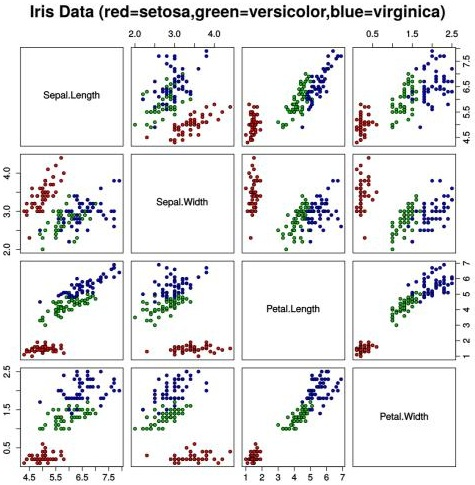

***Condições de Pré-processamento***

*1 - Normalização Min-Max: Escalar todas as variáveis para o intervalo [0, 1].*

*2 - Padronização (Z-score): Transformar as variáveis para que tenham média 0 e desvio padrão 1.*

*3 - Ambos sequencialmente: Primeiro aplicar padronização (z-score), depois normalização Min-Max.*

*'Você pode usar MinMaxScaler e StandardScaler do módulo sklearn.preprocessing.'*

*1 - Utilize validação cruzada (5-fold cross-validation) para avaliar os modelos de forma mais robusta.*

*Para cada iteração da validação cruzada:*

* *Ajuste o escalonador (normalizador ou padronizador) somente nos dados de treino da fold atual.*
* *Aplique a transformação nos dados de treino e teste da fold.*
* *Treine e avalie os classificadores com os dados transformados.*

*2 - Para cada uma das três estratégias de pré-processamento:*

*Aplique a validação cruzada nos dois classificadores:*
* *Naive Bayes (GaussianNB)*
* *KNN com k = 5*

*Armazene e calcule as métricas de desempenho.*

*3 - Avalie os modelos utilizando acurácia média, matriz de confusão média e métricas como precisão, recall e F1-score.*

*4 - Compare os resultados obtidos nas diferentes estratégias de pré-processamento.*

***Análise***

*Como o pré-processamento influenciou o desempenho dos dois algoritmos.*

*Qual classificador teve melhor desempenho em cada cenário.*

*Padrões ou conclusões observadas com base nas métricas.*

*Cuidado com vazamento de dados.*

In [47]:
# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Definir os classificadores
classificadores = {
  "Naive Bayes": GaussianNB(),
  "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Condições de pré-processamento
estrategias_preprocessamento = {
  "Normalização Min-Max": MinMaxScaler(),
  "Padronização Z-score": StandardScaler(),
  "Z-score -> Min-Max": Pipeline([('std', StandardScaler()), ('minmax', MinMaxScaler())])
}

# Utilize validação cruzada (5-fold cross-validation) para avaliar os modelos de forma mais robusta
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = []

# Iterações para cada estratégia de pré-processamento
for p_name, preprocessor in estrategias_preprocessamento.items():
  # Iteração classificadores
  for c_name, classifier in classificadores.items():
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    fold_conf_matrices = []

    # Folds da validação cruzada
    for train_index, test_index in skf.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      # Ajuste o escalonador (normalizador ou padronizador) somente nos dados de treino da fold atual
      if preprocessor:
        X_train_processed = preprocessor.fit_transform(X_train)
        #  Aplique a transformação nos dados de treino e teste da fold
        X_test_processed = preprocessor.transform(X_test)
      else:
        X_train_processed, X_test_processed = X_train, X_test

      # Treine e avalie os classificadores com os dados transformados
      classifier.fit(X_train_processed, y_train)
      y_pred = classifier.predict(X_test_processed)

      # Armazene as métricas de desempenho
      fold_accuracies.append(accuracy_score(y_test, y_pred))
      # average=macro serve para tratar todas as classes igualmente
      fold_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
      fold_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
      fold_f1s.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
      fold_conf_matrices.append(confusion_matrix(y_test, y_pred))

    # Calcule os modelos utilizando acurácia média, matriz de confusão média e métricas como precisão, recall e F1-score
    results.append({
      "-Estratégia": p_name,
      "-Classificador": c_name,
      "-Acurácia média": np.mean(fold_accuracies),
      "-Precisão média": np.mean(fold_precisions),
      "-Recall médio": np.mean(fold_recalls),
      "-F1-score médio": np.mean(fold_f1s),
      "-Matriz de confusão média": np.mean(fold_conf_matrices, axis=0).round(2)
    })

# Resultados
results_df = pd.DataFrame(results)
print(results_df[['-Estratégia', '-Classificador', '-Acurácia média', '-Precisão média', '-Recall médio','-F1-score médio']])

print("\nMatrizes de confusão médiaas:")
for _, row in results_df.iterrows():
    print(f"\n-Estratégia: {row['-Estratégia']}, -Classificador: {row['-Classificador']}")
    print(row['-Matriz de confusão média'])

            -Estratégia -Classificador  -Acurácia média  -Precisão média  \
0  Normalização Min-Max    Naive Bayes         0.946667         0.948822   
1  Normalização Min-Max      KNN (k=5)         0.960000         0.961077   
2  Padronização Z-score    Naive Bayes         0.946667         0.948822   
3  Padronização Z-score      KNN (k=5)         0.973333         0.974545   
4    Z-score -> Min-Max    Naive Bayes         0.946667         0.948822   
5    Z-score -> Min-Max      KNN (k=5)         0.960000         0.961077   

   -Recall médio  -F1-score médio  
0       0.946667         0.946533  
1       0.960000         0.959933  
2       0.946667         0.946533  
3       0.973333         0.973300  
4       0.946667         0.946533  
5       0.960000         0.959933  

Matrizes de confusão médiaas:

-Estratégia: Normalização Min-Max, -Classificador: Naive Bayes
[[10.   0.   0. ]
 [ 0.   9.2  0.8]
 [ 0.   0.8  9.2]]

-Estratégia: Normalização Min-Max, -Classificador: KNN (k=5)
[[1

***Critérios para análise***

*3 - Avalie os modelos utilizando acurácia média, matriz de confusão média e métricas como precisão, recall e F1-score.*

*4 - Compare os resultados obtidos nas diferentes estratégias de pré-processamento.*

***Análise***

*Como o pré-processamento influenciou o desempenho dos dois algoritmos.*

* Naive Bayes: Assume distribuição gaussiana nas features. Como o escalonamento MinMax ou Z-Score apenas altera escala e posição, o desempenho se manteve alto (acurácia = 0,95) em todas as estratégias. Dessa forma, este classificador se mostrou sem mudanças com as estratégias de pré-processamento. Todas as métricas e a matriz de confusão média permaneceram as mesmas em todos os três cenários.
* KNN: Este algoritmo é baseado em distância. Então features com scalas maiores podem influenciar o cálculo da distância, mudando o resultado. O desempenho foi bom com a normalização Min-Max (acurácia = 0.96) e melhor com a padronização Z-score (acurácia = 0.97), que se mostrou a estratégia mais eficaz. A combinação de Z-score e Min-Max não trouxe melhorias adicionais.



*Qual classificador teve melhor desempenho em cada cenário.*
* Em todos os cenários de pré-processamento, o KNN apresentou um desempenho (acurácia) superior ao Naive Bayes.

*Padrões ou conclusões observadas com base nas métricas.*
* A conclusão mais importante é a confirmação de que algoritmos baseados em distância, como o KNN, são sensíveis à escala das features. Já algoritmos baseados em probabilidade, como o Naive Bayes, podem não ser afetados.
* Resumindo, para o conjunto de dados Iris, o pré-processamento é importante pra melhorar o desempenho do KNN, mas é indiferente para o Naive Bayes. O KNN superou o Naive Bayes, e a padronização Z-score provou ser a estratégia de preparação de dados mais eficaz.
* Por fim, sobre as matrizes de confusão, estas demonstraram que a maioria dos erros para ambos os classificadores ocorre ao se confundir as classes 1 (Versicolor) e 2 (Virginica). E a padronização com KNN foi a que melhor conseguiu separar essas duas classes, minimizando os erros.


#####**D)** *Classificador KNN no Conjunto de Dados Íris usando Curvas ROC.*

*Usando o conjunto de dados Iris, que contém 150 amostras de 3 espécies de flores do gênero Iris: setosa, versicolor e virginica. Cada amostra possui 4 features. Use apenas duas features.*

*Você irá utilizar o classificador K-Nearest Neighbors (KNN) para realizar uma tarefa de classificação binária, onde a variável alvo será se a amostra pertence ou não à classe versicolor.*

*1 - Converta o problema em uma classificação binária, onde a classe positiva é versicolor e a classe negativa é "não versicolor".*

*2 - Divida o conjunto de dados em conjunto de treino (70%) e conjunto de teste (30%) utilizando uma semente aleatória para reprodutibilidade.*

*3 - Para k ∈ {1,3,5,7,9}, faça o seguinte:*

* *Treine um classificador KNN com o valor de k correspondente.*
* *Faça a predição das probabilidades para o conjunto de teste (ou seja, a probabilidade de que uma amostra pertença à classe positiva).*
* *Calcule a curva ROC e a AUC para cada valor de k.*
* *Plote todas as curvas ROC em um único gráfico, uma para cada valor de k, com rótulos e legenda apropriados.*
* *Comente como o valor de k influencia o desempenho do classificador, com base nas curvas ROC e nos valores de AUC.*
* *Compare com o resultado do trabalho anterior que também usou o dataset Iris e avalie quanto ao bias e variance.*

*Resultado esperado:*

*Um gráfico com todas as curvas ROC (uma para cada k).*

*O valor da AUC para cada valor de k.*

*Uma breve interpretação dos resultados.*

*Dicas:*

*Use KNeighborsClassifier(..., probability=True) do módulo sklearn.neighbors.*

*Use as funções roc_curve e auc do módulo sklearn.metrics.*

*model.predict_proba(X_test)*



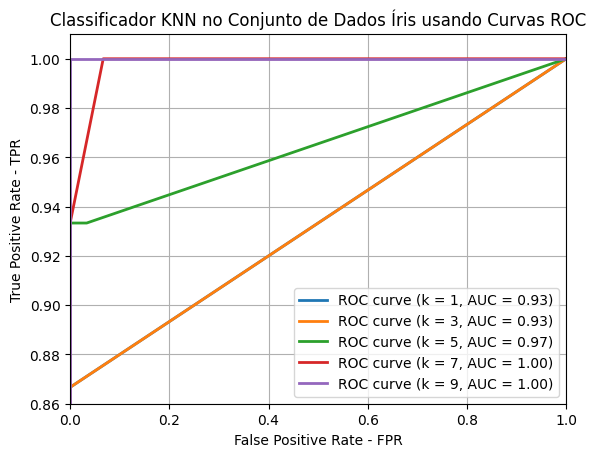

In [48]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Use apenas duas features (petal length e petal width)
X = iris.data[:, [2, 3]]

# 1 - Converta o problema em uma classificação binária, on de a classe
# positiva é versicolor (1) e a classe negativa é "não versicolor" (0).
y = (iris.target == 1).astype(int)

# 2 - Divida o conjunto de dados em conjunto de treino (70%) e conjunto
# de teste (30%) utilizando uma semente aleatória para reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42, stratify=y
)

# 3 - Para k ∈ {1,3,5,7,9}, faça o seguinte:
plt.figure()

k_values = [1, 3, 5, 7, 9] #
for k in k_values:
  # 3.1 - Treine um classificador KNN com o valor de k correspondente.
  # Use KNeighborsClassifier(..., probability=True) do módulo sklearn.neighbors.
  # (não funciona usar probability=True, já tem o predict_proba)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  # 3.2 - Faça a predição das probabilidades para o conjunto de teste
  # (ou seja, a probabilidade de que uma amostra pertença à classe positiva).
  # Use model.predict_proba(X_test)
  y_scores = knn.predict_proba(X_test)[:, 1]

  # 3.3 - Calcule a curva ROC e a AUC para cada valor de k.
  # Use as funções roc_curve e auc do módulo sklearn.metrics.
  fpr, tpr, thresholds = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # 3.4 - Plote todas as curvas ROC em um único gráfico, uma para cada valor
  # de k, com rótulos e legenda apropriados.
  plt.plot(fpr, tpr, lw=2, label=f'ROC curve (k = {k}, AUC = {roc_auc:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.86, 1.01])
plt.xlabel('False Positive Rate - FPR')
plt.ylabel('True Positive Rate - TPR')
plt.title('Classificador KNN no Conjunto de Dados Íris usando Curvas ROC')
plt.legend()
plt.grid(True)
plt.show()

*Resultado esperado:*

*- Um gráfico com todas as curvas ROC (uma para cada k).* OK

*- O valor da AUC para cada valor de k.* OK

*- Uma breve interpretação dos resultados:*
___

*3.5 - Comente como o valor de k influencia o desempenho do classificador, com base nas curvas ROC e nos valores de AUC.*

**O gráfico com as curvas ROC obtidas e os valores de AUC demonstram que os resultados que melhoram conforme k aumenta.**

**Para k = 1 e k = 3: os modelos com valores de k menorse apresentaram um desempenho muito bom, ambos AUC = 0.93. Isso indica uma alta capacidade de distinção entre as classes, mas com alguma sobreposição entre elas.**

**k = 5: o desempenho melhorou, AUC = 0.97. A curva de k=5 ficou mais próxima do canto superior esquerdo, indicando um classificador mais eficiente.**

**k = 7 e k = 9: para k=7 e k=9 o classificador atingiu AUC = 1, apresentando um resultado perfeito. Isso significa que o modelo conseguiu chegar numa probabilidade que diferencia perfeitamente as amostras da classe versicolor das não versicolor no conjunto de teste.**
___
*3.6 - Compare com o resultado do trabalho anterior que também usou o dataset Iris e avalie quanto ao bias e variance.*

**k baixo (k=1): esse tipo de modelo tem baixo bias e alta variância. Ele se ajusta de forma muito específica aos dados de treino, o que pode levar a um superajuste, ou, overfitting. A alta variância impediu o modelo de generalizar perfeitamente para o conjunto de teste**

**k alto (k=7, k=9): Ao aumentar o k o limite de decisão se torna mais suave e o modelo fica mais simples. Isso aumenta o bias, mas diminui a variância. Para o conjunto de dataset Iris desse caso, a diminuição da variância ajudou bastante, porque o modelo passou a ignorar ruídos e fez uma generalização perfeita no conjunto de teste. AUC = 1 para k=7 e k=9 indica que os valores de k encontraram um ajuste ótimo.**

**Por fim, conclui-se que quando se compara com a Atividade C, que foi uma classificação do tipo multiclasse, o KNN já tinha se mostrado um ótimo classificador. Já nessa atividade, que trata de uma classificação binária, o desempenho do KNN foi melhor. Chegar em AUC = 1 indica que, com um k escolhido de forma adequada (para este caso, aumentando k), a separação da classe positiva versicolor das outras classes é satisfatoriamente realizada pelo KNN com as features determinadas para este problema.**